In [44]:
from utils import load_data
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [45]:
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data('cora')
adj = np.array(adj.todense())

In [46]:
print(type(adj))

<class 'numpy.ndarray'>


In [47]:
def bfs(adj):
    start_node = 0
    visited = np.full(shape=adj.shape[0], fill_value=False, dtype=np.bool)
    queue = [start_node]
    while len(queue) != 0:
        current_node = queue.pop()
        if visited[current_node]:
            continue
        visited[current_node] = True
        neighbours = np.argwhere(adj[current_node] == 1)[:,0]
        for n in neighbours:
            if not(visited[n]):
                queue.append(n)
    print(len(np.argwhere(visited == True)))
    print(len(adj))

2485
2708


In [49]:
def degrees(adj):
    return np.sum(adj, axis=-1)

In [103]:
D = degrees(adj)
average_degree = np.mean(D)
print(average_degree)
for i, c in enumerate(np.bincount(D)):
    print(i,c)
print(np.argwhere(np.bincount(D) > 0)[:,0])

3.8980797636632203
0 0
1 485
2 583
3 553
4 389
5 281
6 131
7 82
8 57
9 25
10 26
11 14
12 18
13 5
14 6
15 6
16 7
17 8
18 3
19 5
20 0
21 3
22 1
23 3
24 0
25 0
26 1
27 0
28 0
29 1
30 2
31 1
32 2
33 1
34 1
35 0
36 1
37 0
38 0
39 0
40 1
41 0
42 1
43 0
44 1
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 1
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 1
75 0
76 0
77 0
78 1
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 1
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  1

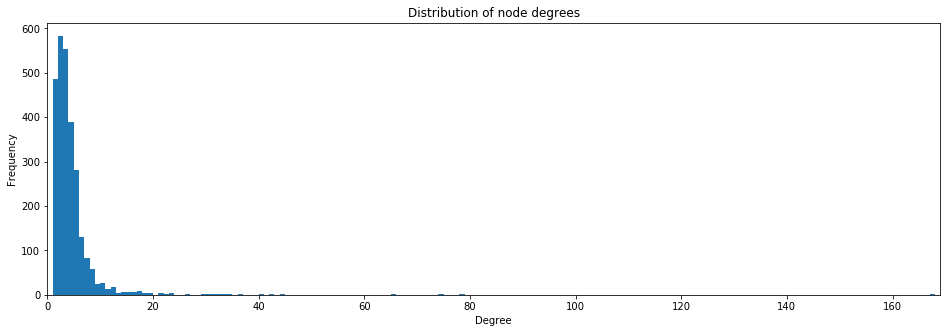

In [90]:
%matplotlib inline
plt.figure(figsize=(16,5))
plt.hist(D, bins=np.arange(D.min(), D.max()+1))
plt.xlim(0, D.max()+1)
plt.title("Distribution of node degrees")
plt.xlabel("Degree")
plt.ylabel("Frequency")
# plt.savefig("./figs/node_degrees.png", bbox_inches='tight')

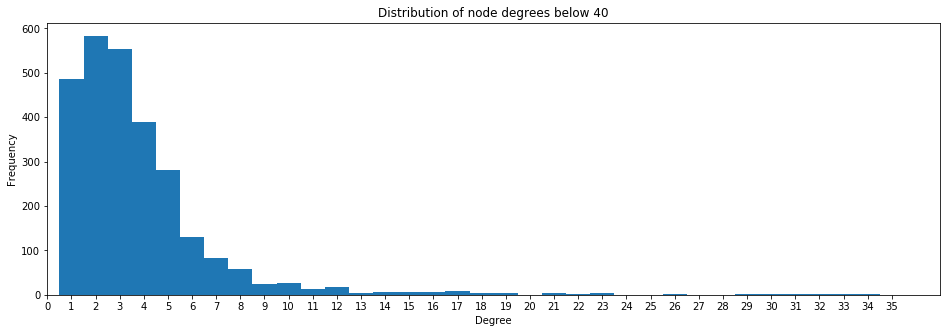

In [89]:
trunc_D = D[D < 40]
plt.figure(figsize=(16,5))
plt.hist(trunc_D, bins=np.arange(trunc_D.min(), trunc_D.max()), align='left')
plt.xlim(0, trunc_D.max()+1)
plt.xticks(np.arange(0, trunc_D.max()))
plt.title("Distribution of node degrees below 40")
plt.xlabel("Degree")
plt.ylabel("Frequency")
# plt.savefig("./figs/node_degrees_truncated.png", bbox_inches='tight')

In [87]:
print(len(D))
print(len(trunc_D))
print(len(trunc_D)/len(D))

2708
2701
0.9974150664697193


In [100]:
for i,c in enumerate(np.cumsum(np.bincount(D))):
    print("Degree: {}, cum_count: {}, cum_freq: {:.3f}".format(i, c, c/len(D)))

Degree: 0, cum_count: 0, cum_freq: 0.000
Degree: 1, cum_count: 485, cum_freq: 0.179
Degree: 2, cum_count: 1068, cum_freq: 0.394
Degree: 3, cum_count: 1621, cum_freq: 0.599
Degree: 4, cum_count: 2010, cum_freq: 0.742
Degree: 5, cum_count: 2291, cum_freq: 0.846
Degree: 6, cum_count: 2422, cum_freq: 0.894
Degree: 7, cum_count: 2504, cum_freq: 0.925
Degree: 8, cum_count: 2561, cum_freq: 0.946
Degree: 9, cum_count: 2586, cum_freq: 0.955
Degree: 10, cum_count: 2612, cum_freq: 0.965
Degree: 11, cum_count: 2626, cum_freq: 0.970
Degree: 12, cum_count: 2644, cum_freq: 0.976
Degree: 13, cum_count: 2649, cum_freq: 0.978
Degree: 14, cum_count: 2655, cum_freq: 0.980
Degree: 15, cum_count: 2661, cum_freq: 0.983
Degree: 16, cum_count: 2668, cum_freq: 0.985
Degree: 17, cum_count: 2676, cum_freq: 0.988
Degree: 18, cum_count: 2679, cum_freq: 0.989
Degree: 19, cum_count: 2684, cum_freq: 0.991
Degree: 20, cum_count: 2684, cum_freq: 0.991
Degree: 21, cum_count: 2687, cum_freq: 0.992
Degree: 22, cum_count: 2